# Fraudulent Activities Project

## Import des librairies et des données 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fraud = pd.read_csv("Fraud_Data.csv")
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip = pd.read_csv("IpAddress_to_Country.csv")
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud = pd.read_csv("fraud_value_ip.csv", sep = ";")
fraud = fraud.drop(columns=['_lower_bound_ip_address_', '_upper_bound_ip_address_', '_user_id_', '_device_id_', '_ip_address_'])
fraud.head()

,_signup_time_,_purchase_time_,_purchase_value_,_source_,_browser_,_sex_,_age_,_class_,_country_
0,2015-04-10 04:06:13.0000000,2015-04-14 08:22:36.0000000,48,Ads,FireFox,M,39,0,Ukraine
1,2015-05-28 06:58:45.0000000,2015-07-23 20:44:42.0000000,85,Ads,FireFox,F,25,0,China
2,2015-04-27 02:21:07.0000000,2015-05-01 02:32:27.0000000,30,Direct,FireFox,M,24,0,Germany
3,2015-07-06 01:43:42.0000000,2015-09-25 21:30:57.0000000,11,Direct,FireFox,F,37,0,United States
4,2015-06-17 18:47:59.0000000,2015-07-07 06:40:52.0000000,32,Ads,Safari,F,27,0,China


## Traitement et première analyse des données

In [6]:
fraud.describe()

,_purchase_value_,_age_,_class_
count,151112.000000,151112.000000,151112.000000
mean,36.935372,33.140704,0.093646
std,18.322762,8.617733,0.291336
min,9.000000,18.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,35.000000,33.000000,0.000000
75%,49.000000,39.000000,0.000000
max,154.000000,76.000000,1.000000


In [7]:
fraud.dtypes

_signup_time_       object
_purchase_time_     object
_purchase_value_     int64
_source_            object
_browser_           object
_sex_               object
_age_                int64
_class_              int64
_country_           object
dtype: object

In [8]:
# Traitement des valeurs manquantes
fraud.isnull().sum()/len(fraud)*100

_signup_time_        0.000000
_purchase_time_      0.000000
_purchase_value_     0.000000
_source_             0.000000
_browser_            0.000000
_sex_                0.000000
_age_                0.000000
_class_              0.000000
_country_           14.536238
dtype: float64

In [9]:
fraud["_country_"].fillna("Unknown", inplace = True)

In [10]:
fraud.isnull().values.any()

False

In [11]:
# Taux de fraude
print(round(len(fraud.query ('_class_ == 1')) / len (fraud.query ('_class_ == 0')), 2) * 100, "%")

10.0 %


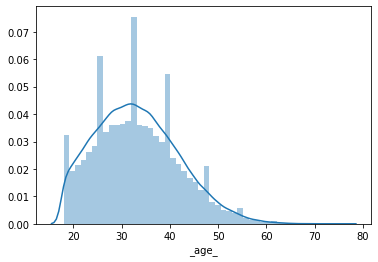

In [12]:
sns.distplot(fraud._age_)

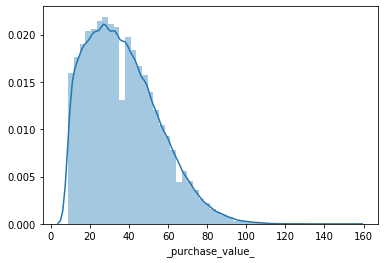

In [13]:
sns.distplot(fraud._purchase_value_)


In [30]:
countries = pd.DataFrame(fraud._country_.value_counts())
countries.query("_country_ >= 100").head()

,_country_
United States,58049
Unknown,21966
China,12038
Japan,7306
United Kingdom,4490


## Modélisation des données

In [14]:
# Séparation des variables
X_num = fraud[["_purchase_value_", "_age_"]]
X_cat = fraud[["_source_", "_browser_", "_sex_", "_country_"]]
Y = fraud[["_class_"]]

In [15]:
# Normalisation des variables quantitatives
from sklearn import preprocessing
sc_x = preprocessing.StandardScaler()
X_num = sc_x.fit_transform(X_num)

In [16]:
# Traitement des variables catégoriques
X_cat = pd.get_dummies(X_cat, drop_first = True)
X_cat.head()

,_source__Direct,_source__SEO,_browser__FireFox,_browser__IE,_browser__Opera,_browser__Safari,_sex__M,_country__Albania,_country__Algeria,_country__Angola,...,_country__Unknown,_country__Uruguay,_country__Uzbekistan,_country__Vanuatu,_country__Venezuela,_country__Viet Nam,_country__Virgin Islands (U.S.),_country__Yemen,_country__Zambia,_country__Zimbabwe
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = pd.concat ([pd.DataFrame(X_num, columns = ["_purchase_value_", "_age_"]), X_cat], axis = 1)
X.head()

,_purchase_value_,_age_,_source__Direct,_source__SEO,_browser__FireFox,_browser__IE,_browser__Opera,_browser__Safari,_sex__M,_country__Albania,...,_country__Unknown,_country__Uruguay,_country__Uzbekistan,_country__Vanuatu,_country__Venezuela,_country__Viet Nam,_country__Virgin Islands (U.S.),_country__Yemen,_country__Zambia,_country__Zimbabwe
0,0.603875,0.679914,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.623228,-0.944649,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.378513,-1.060689,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.415478,0.447833,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.269358,-0.712568,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Séparation en données d'entraînement et test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
# Entraînement des modèles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,gb_param_grid, cv=10, scoring="accuracy", verbose = 1)

gsGBC.fit(X_train,np.ravel(Y_train))

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
randF = RandomForestClassifier()
randF_param_grid = {'bootstrap': [True, False],
                     'max_depth': [10, 50, 80, None],
                     'max_features': ['auto', 'sqrt'],
                     'min_samples_leaf': [1, 4],
                     'min_samples_split': [2, 10],
                     'n_estimators': [50, 200]}

gsrandF = GridSearchCV(randF,randF_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)
gsrandF.fit(X_train, y_train)

gsrandF_best = gsrandF.best_estimator_
gsrandF.best_score_

In [ ]:
gsrandF.score(X_test, y_test)

In [ ]:
Log = LogisticRegression()
log_param_grid = {"solver":["newton-cg", "liblinear", "sag", "saga"],
                 "class_weight": [None, "balanced"],
                 "C": [0.5, 0.6,0.7,0.8,0.9,1.0],
                 "tol": [1e-4, 1e-3]}
gsLog = GridSearchCV(Log, log_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsLog.fit(X_train, np.ravel(y_train))
gsLog_best = gsLog.best_estimator_
gsLog.best_score_

In [ ]:
gsLog_best.score(X_test, y_test)